### 🧩 Case Study: Analyzing Factors Affecting Restaurant Tips
🎯 Objective

Use data analysis and visualization to understand what factors influence the amount of tip customers leave in restaurants.

You’ll explore relationships between variables such as:

Total bill

Gender of the customer

Day of the week

Time of day (Lunch/Dinner)

Party size

📦 1. Dataset

Use Seaborn’s built-in dataset:

import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()


Columns include:

total_bill: Total bill amount (in dollars)

tip: Tip amount (in dollars)

sex: Gender of the customer

smoker: Whether the customer was a smoker or not

day: Day of the week

time: Time of meal (Lunch/Dinner)

size: Number of people in the party

🔧 2. Tools Used

Pandas → Data cleaning, aggregation, and manipulation

NumPy → Numerical operations, statistics, and derived metrics

Matplotlib & Seaborn → Data visualization and pattern discovery

🧹 3. Data Cleaning & Preprocessing

Tasks:

Check for missing values and duplicates.

Create a new column tip_percent = (tip / total_bill) * 100.

Use NumPy to calculate summary stats:

import numpy as np
np.mean(tips['tip_percent'])
np.median(tips['tip_percent'])
np.std(tips['tip_percent'])


Convert categorical data types (if needed).

📊 4. Exploratory Data Analysis (EDA)

Use Seaborn and Matplotlib to visualize patterns.

Example visualizations:
Question	Visualization	Function
What is the relationship between total bill and tip?	Scatter plot	sns.scatterplot()
Do men or women tip more?	Box plot	sns.boxplot()
How does tipping differ across days?	Bar plot	sns.barplot()
Does party size affect the tip amount?	Line plot	sns.lineplot()
What’s the overall distribution of tip percentage?	Histogram	sns.histplot()

Add titles, axis labels, and annotations using plt.title(), plt.xlabel(), and plt.ylabel().

📈 5. Insights & Conclusions

Summarize what you found:

Do larger bills result in higher tips (in absolute or percentage terms)?

Does gender or smoking status influence tipping behavior?

Which day or time yields the highest average tip?

🧠 6. Bonus Extensions

If you want to make it more advanced:

Perform a correlation analysis using sns.heatmap().

Add regression lines with sns.lmplot().

Use groupby() in Pandas to compute aggregated insights (e.g., average tip by day and gender).

Export visualizations or final results to a .csv or .pdf report.

📁 Deliverables

Jupyter Notebook (.ipynb) with:

Data cleaning

EDA and visualizations

Conclusions & insights

(Optional) Report or dashboard summarizing findings.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
tips = sns.load_dataset("tips")

In [6]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Checking if it contain null values

In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
tips.isna()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [9]:
tips["total_bill"].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: total_bill, Length: 244, dtype: bool

In [10]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [11]:
tips.isnull().sum().sum()

np.int64(0)

In [12]:
tips.isnull().mean()

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [13]:
tips.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [14]:
tips.duplicated().sum()

np.int64(1)

In [15]:
tips[tips.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [16]:
tips.loc[200:205]

,total_bill,tip,sex,smoker,day,time,size
200,18.71,4.00,Male,Yes,Thur,Lunch,3
201,12.74,2.01,Female,Yes,Thur,Lunch,2
202,13.00,2.00,Female,Yes,Thur,Lunch,2
203,16.40,2.50,Female,Yes,Thur,Lunch,2
204,20.53,4.00,Male,Yes,Thur,Lunch,4
205,16.47,3.23,Female,Yes,Thur,Lunch,3


In [17]:
tips[tips.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [18]:
tips.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
tips.duplicated().sum()

np.int64(1)

In [20]:
tips[tips.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [21]:
tips = tips.drop_duplicates()

In [22]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
tips.duplicated().sum()

np.int64(0)

In [24]:
tips = tips.copy()
tips["tip_percent"] = (tips["tip"] / tips["total_bill"]) * 100

In [25]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [26]:
print(f"Mean = {np.mean(tips['tip_percent'])}")
print(f"Median = {np.median(tips['tip_percent'])}")
print(f"Std = {np.std(tips['tip_percent'])}")

Mean = 16.083120899771604
Median = 15.521855486173058
Std = 6.107056706565666


C:\Users\saart\AppData\Local\Temp\ipykernel_14212\4282111198.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


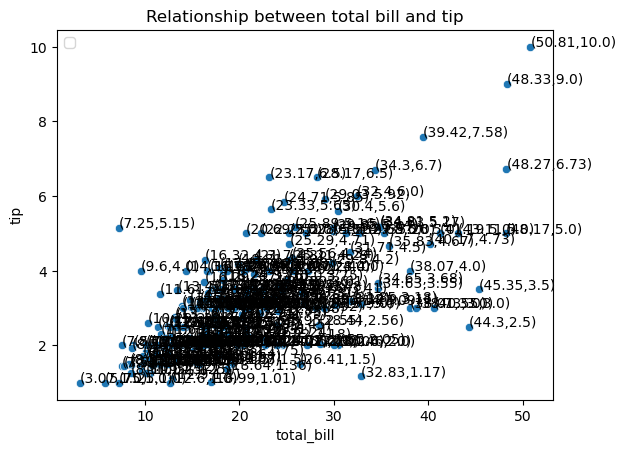

In [27]:
sns.scatterplot(x="total_bill" , y="tip", data=tips)
plt.legend()
plt.title("Relationship between total bill and tip")
for i in range(len(tips["total_bill"])):
    plt.annotate(f"({tips["total_bill"].iloc[i]},{tips["tip"].iloc[i]})", (tips["total_bill"].iloc[i], tips["tip"].iloc[i]))

<Axes: xlabel='sex', ylabel='tip'>

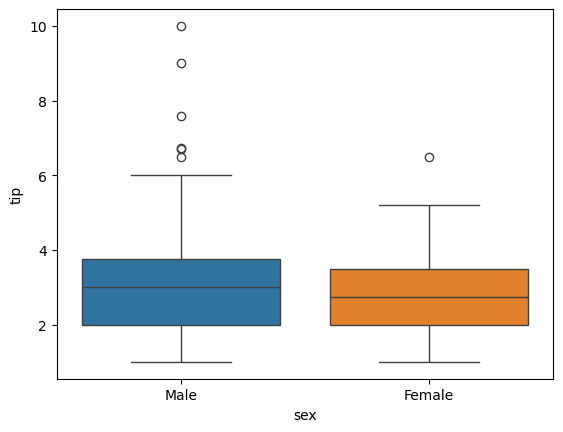

In [28]:
sns.boxplot(x="sex", y="tip", data=tips, hue="sex")

<Axes: xlabel='day', ylabel='tip'>

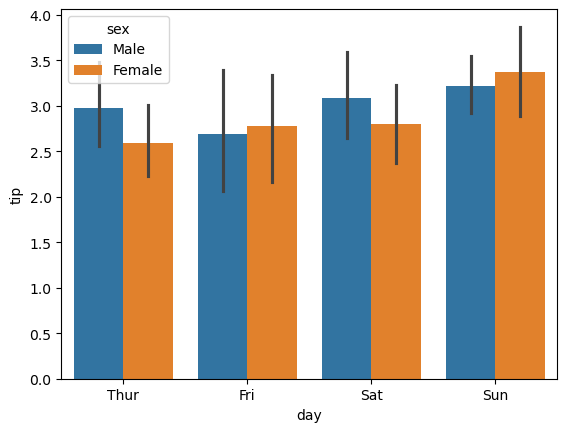

In [29]:
sns.barplot(x="day", y="tip", data= tips, hue="sex")

<Axes: xlabel='size', ylabel='tip'>

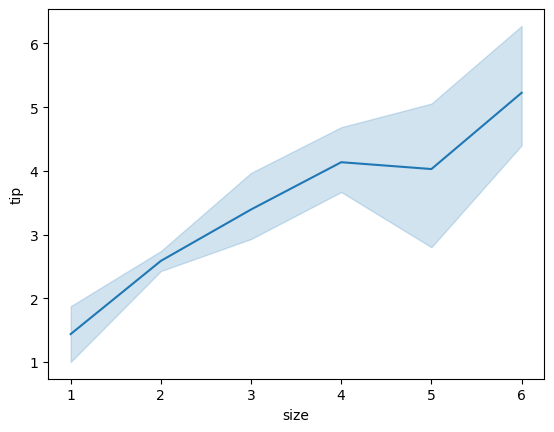

In [30]:
sns.lineplot(x="size", y="tip", data=tips)

<Axes: xlabel='sex', ylabel='tip_percent'>

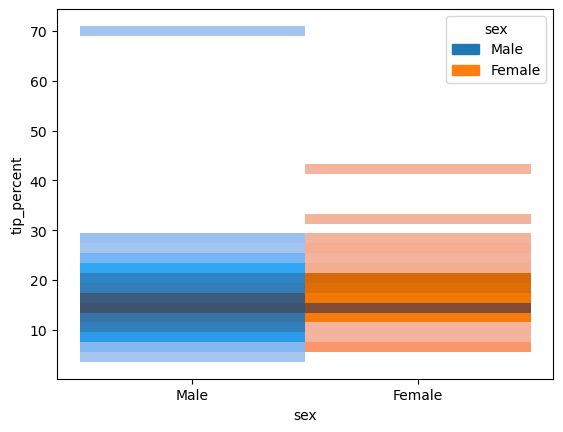

In [31]:
sns.histplot(x="sex", y="tip_percent", data=tips, hue="sex")

In [32]:
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ["0-10","10-20","20-30","30-40","40-50","50-100"]
tips["bill_range"] = pd.cut(tips["total_bill"], bins=bins, labels=labels)

# Calculate average tip and tip percent for each bin
tips.groupby("bill_range")[["tip", "tip_percent"]].mean()
#print(summary)

C:\Users\saart\AppData\Local\Temp\ipykernel_14212\782321595.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("bill_range")[["tip", "tip_percent"]].mean()


,tip,tip_percent
bill_range,,
0-10,1.837647,23.420672
10-20,2.458760,16.573388
20-30,3.607692,15.100225
30-40,4.190909,12.348562
40-50,4.940000,11.023968
50-100,10.000000,19.681165


In [33]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_percent,bill_range
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,10-20
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,10-20
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,20-30
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,20-30
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,20-30
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697,20-30
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352,20-30
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232,20-30
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426,10-20


In [46]:
gender_tip = tips.groupby("sex")["tip_percent"].mean()

C:\Users\saart\AppData\Local\Temp\ipykernel_14212\2207790125.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_tip = tips.groupby("sex")["tip_percent"].mean()


In [47]:
gender_tip

sex
Male      15.765055
Female    16.663777
Name: tip_percent, dtype: float64

In [40]:
type(gender_tip)

pandas.core.series.Series

<Axes: xlabel='sex', ylabel='tip_percent'>

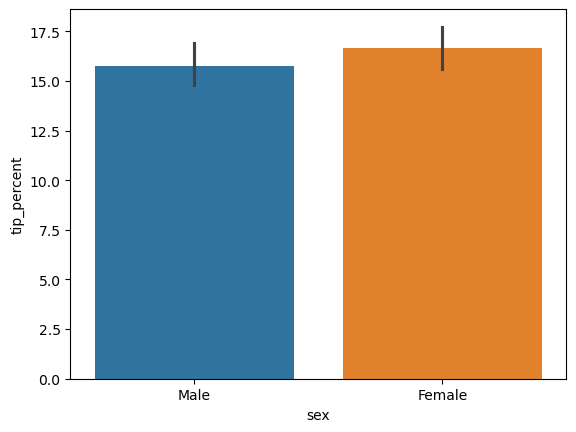

In [43]:
sns.barplot(x="sex", y="tip_percent", data=tips, hue="sex")

In [48]:
smoking_tip = tips.groupby("smoker")["tip_percent"].mean()

C:\Users\saart\AppData\Local\Temp\ipykernel_14212\3191215390.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoking_tip = tips.groupby("smoker")["tip_percent"].mean()


In [49]:
smoking_tip

smoker
Yes    16.329767
No     15.932846
Name: tip_percent, dtype: float64

<Axes: xlabel='smoker', ylabel='tip_percent'>

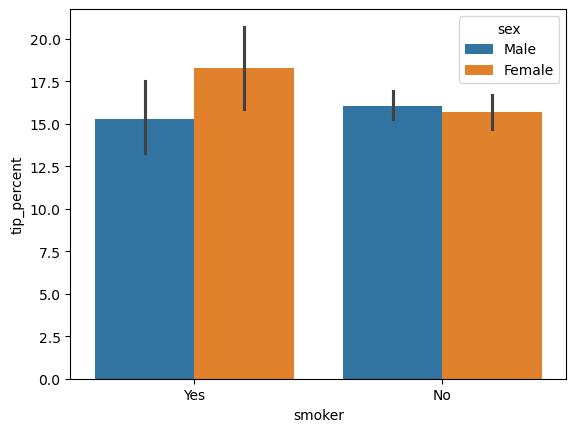

In [52]:
sns.barplot(x="smoker", y="tip_percent", data=tips, hue="sex")

In [59]:
tips.groupby(["time", "day"])["tip_percent"].mean()

C:\Users\saart\AppData\Local\Temp\ipykernel_14212\4165045900.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(["time", "day"])["tip_percent"].mean()


time    day 
Lunch   Thur    16.142498
        Fri     18.876489
        Sat           NaN
        Sun           NaN
Dinner  Thur    15.974441
        Fri     15.891611
        Sat     15.315172
        Sun     16.689729
Name: tip_percent, dtype: float64

In [56]:
tips.groupby(["time", "day"])["tip_percent"].mean().max()

C:\Users\saart\AppData\Local\Temp\ipykernel_14212\175522877.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(["time", "day"])["tip_percent"].mean().max()


18.876488829484337

In [60]:
tips.groupby(["time", "day"])["tip_percent"].mean().unstack()


C:\Users\saart\AppData\Local\Temp\ipykernel_14212\3572261320.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(["time", "day"])["tip_percent"].mean().unstack()


day,Thur,Fri,Sat,Sun
time,,,,
Lunch,16.142498,18.876489,NaN,NaN
Dinner,15.974441,15.891611,15.315172,16.689729


C:\Users\saart\AppData\Local\Temp\ipykernel_14212\1508085069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tips = tips.groupby(["time", "day"])["tip_percent"].mean().unstack()


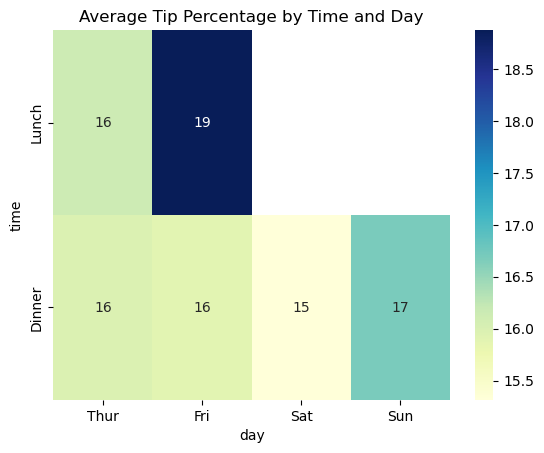

In [61]:
avg_tips = tips.groupby(["time", "day"])["tip_percent"].mean().unstack()
sns.heatmap(avg_tips, annot=True, cmap="YlGnBu")
plt.title("Average Tip Percentage by Time and Day")
plt.show()